<a href="https://colab.research.google.com/github/putricha/PCVK_Ganjil_2024/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Putri Norchasana**

**Kelas : TI-3D**



1. Connect ke google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

In [ ]:
# Load the main image and template image
main_image_path = '/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg'
template_image_path = '/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg'
main_image = cv2.imread(main_image_path, cv2.IMREAD_COLOR)
template = cv2.imread(template_image_path, cv2.IMREAD_COLOR)

In [ ]:
# Get dimensions of the template
h, w = template.shape[:2]

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

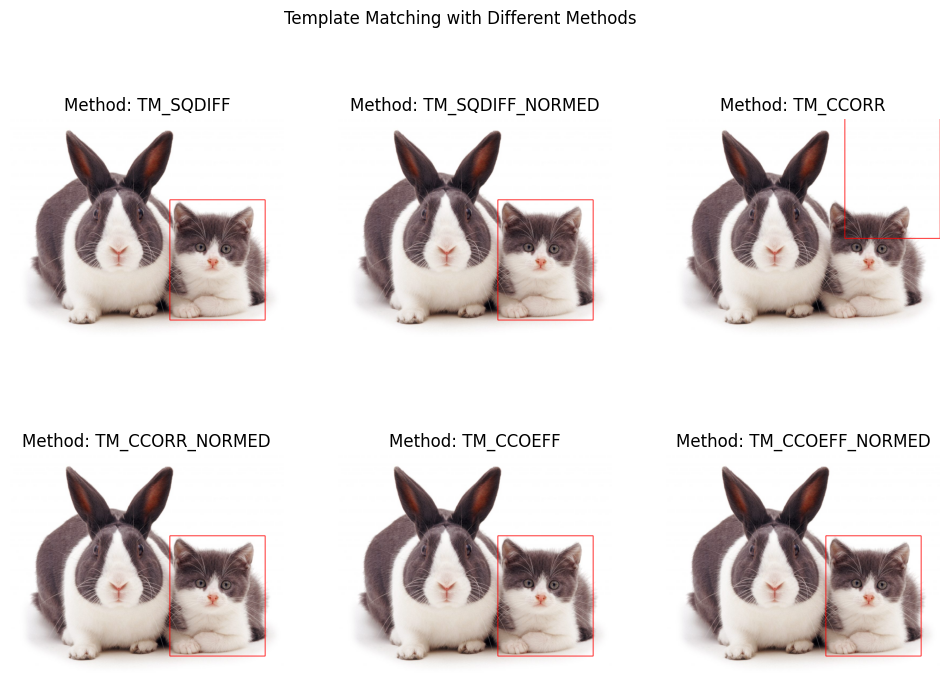

In [ ]:
methods = [
    ("TM_SQDIFF", cv2.TM_SQDIFF),
    ("TM_SQDIFF_NORMED", cv2.TM_SQDIFF_NORMED),
    ("TM_CCORR", cv2.TM_CCORR),
    ("TM_CCORR_NORMED", cv2.TM_CCORR_NORMED),
    ("TM_CCOEFF", cv2.TM_CCOEFF),
    ("TM_CCOEFF_NORMED", cv2.TM_CCOEFF_NORMED)
]

plt.figure(figsize=(12, 8))

for i, (title, method) in enumerate(methods, 1):
    img_display = main_image.copy()
    result = cv2.matchTemplate(img_display, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Choose min_loc for TM_SQDIFF methods and max_loc for others
    top_left = min_loc if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] else max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_display, top_left, bottom_right, (0, 0, 255), 2)

    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
    plt.title(f"Method: {title}")
    plt.axis("off")

plt.suptitle("Template Matching with Different Methods")
plt.show()


3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

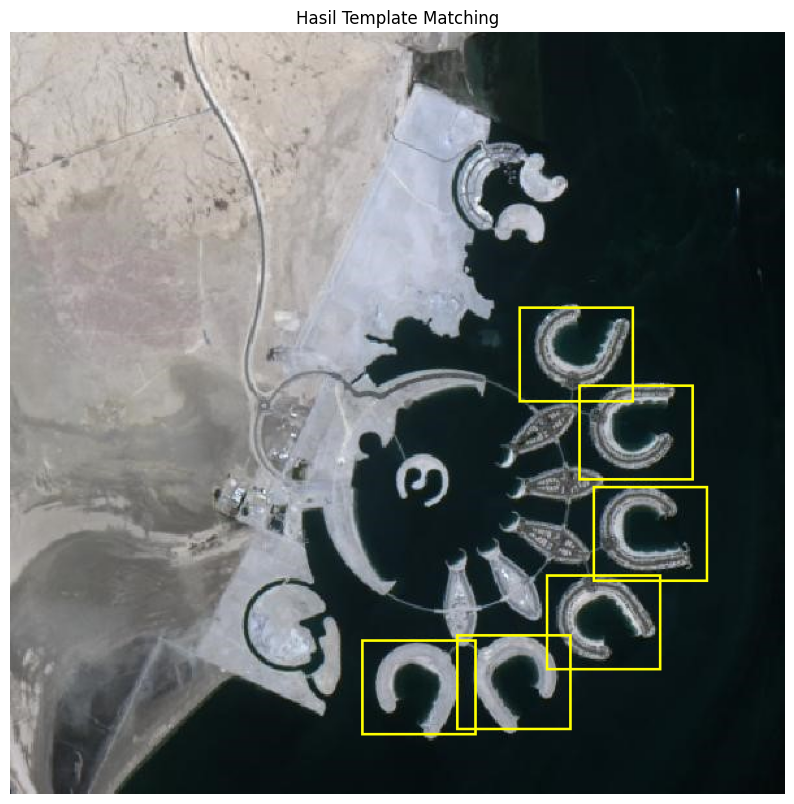

In [ ]:
# Load and preprocess images
input_image = Image.open("/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg").convert('RGB')
template_image = Image.open("/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg").convert('L')
input_array = np.array(input_image.convert('L'))
template_array = np.array(template_image)

input_h, input_w = input_array.shape
template_h, template_w = template_array.shape

# Template matching with normalized cross-correlation
template_mean = template_array.mean()
result_array = np.zeros((input_h - template_h + 1, input_w - template_w + 1))

for y in range(input_h - template_h + 1):
    for x in range(input_w - template_w + 1):
        patch = input_array[y:y + template_h, x:x + template_w]
        patch_mean = patch.mean()
        numerator = np.sum((patch - patch_mean) * (template_array - template_mean))
        denominator = np.sqrt(np.sum((patch - patch_mean) ** 2) * np.sum((template_array - template_mean) ** 2))
        result_array[y, x] = numerator / denominator if denominator != 0 else 0

positions = np.array(np.where(result_array >= 0.45)).T

# Non-maximum suppression
def non_max_suppression(positions, template_w, template_h, thresh=0.3):
    if not len(positions):
        return []

    # Create bounding boxes
    boxes = np.array([[x, y, x + template_w, y + template_h] for y, x in positions])
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    indices = np.argsort(y2)

    pick = []

    while len(indices) > 0:
        last = indices[-1]
        pick.append(last)

        xx1 = np.maximum(x1[last], x1[indices[:-1]])
        yy1 = np.maximum(y1[last], y1[indices[:-1]])
        xx2 = np.minimum(x2[last], x2[indices[:-1]])
        yy2 = np.minimum(y2[last], y2[indices[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[indices[:-1]]

        # Get indices to delete based on the overlap threshold
        to_delete = np.where(overlap > thresh)[0]

        # Ensure valid deletion indices
        indices = np.delete(indices, np.concatenate(([len(indices) - 1], to_delete[to_delete < len(indices)])))

    return boxes[pick].astype(int)


selected_positions = non_max_suppression(positions, template_w, template_h)

# Draw rectangles on output image
draw = ImageDraw.Draw(input_image)
for x1, y1, x2, y2 in selected_positions:
    draw.rectangle([x1, y1, x2, y2], outline="yellow", width=2)

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(input_image)
plt.title("Hasil Template Matching")
plt.axis('off')
plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

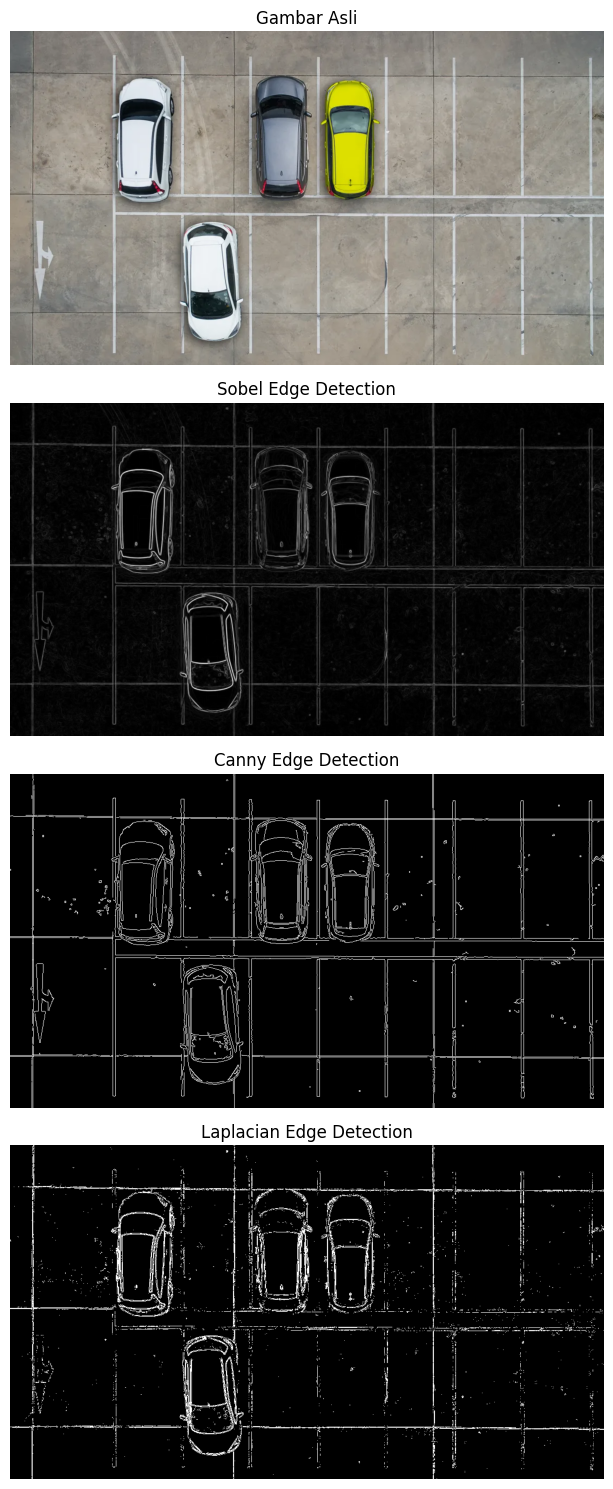

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image
img_rgb = cv2.cvtColor(cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg"), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Edge detections
sobel_combined = cv2.magnitude(cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3), cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3))
canny_edges = cv2.Canny(img_gray, 100, 200)
laplacian_bw = cv2.threshold(np.uint8(np.absolute(cv2.Laplacian(img_gray, cv2.CV_64F))), 50, 255, cv2.THRESH_BINARY)[1]

# Display results
titles = ['Gambar Asli', 'Sobel Edge Detection', 'Canny Edge Detection', 'Laplacian Edge Detection']
images = [img_rgb, sobel_combined, canny_edges, laplacian_bw]

plt.figure(figsize=(8, 15))
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.imshow(images[i], cmap='gray' if i > 0 else None)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

<ipython-input-9-b6a8aa04d79c>:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_shi_tomasi = np.int0(cv2.goodFeaturesToTrack(gray, 100, 0.01, 10))


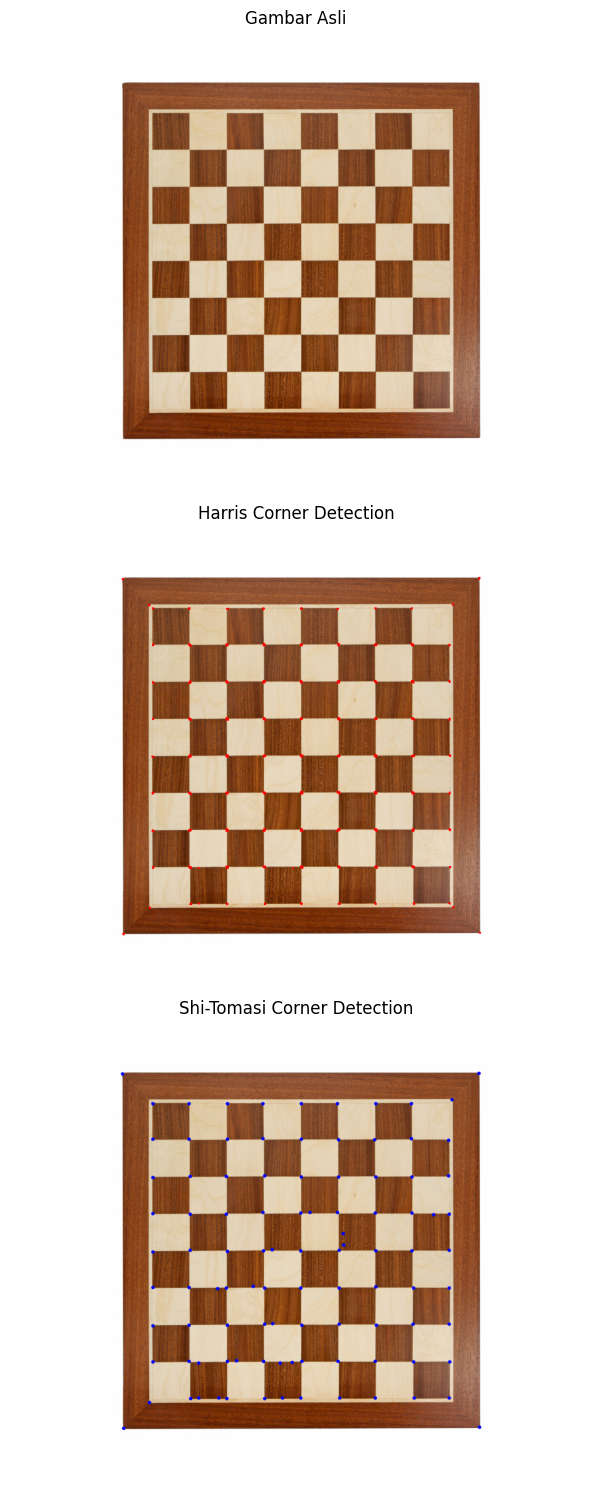

In [ ]:
# Load and convert image to grayscale
img = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Harris Corner Detection
harris_corners = cv2.dilate(cv2.cornerHarris(gray, 2, 3, 0.04), None)
img_harris = img.copy()
img_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Shi-Tomasi Corner Detection
corners_shi_tomasi = np.int0(cv2.goodFeaturesToTrack(gray, 100, 0.01, 10))
img_shi_tomasi = img.copy()
for i in corners_shi_tomasi:
    x, y = i.ravel()
    cv2.circle(img_shi_tomasi, (x, y), 3, (255, 0, 0), -1)

# Display results
titles = ['Gambar Asli', 'Harris Corner Detection', 'Shi-Tomasi Corner Detection']
images = [img, img_harris, img_shi_tomasi]

plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

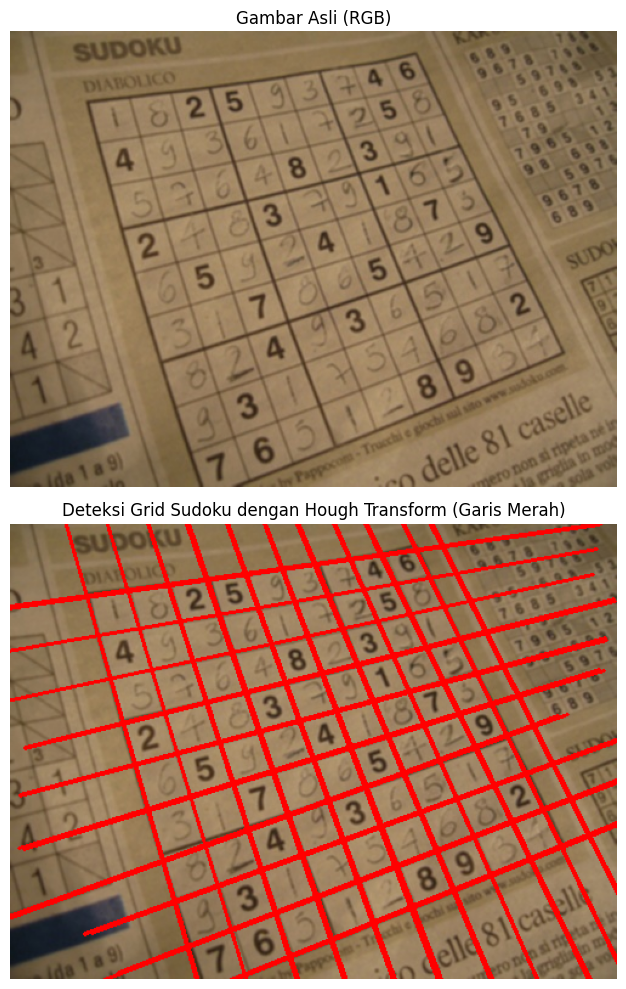

In [ ]:
# Load and convert image
img = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection and morphological operations
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
edges = cv2.erode(cv2.dilate(edges, np.ones((3, 3), np.uint8), iterations=1), np.ones((3, 3), np.uint8), iterations=1)

# Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 220, minLineLength=200, maxLineGap=50)
img_with_lines = img.copy()

# Draw extended lines
if lines is not None:
    for x1, y1, x2, y2 in lines[:, 0]:
        dx, dy = x2 - x1, y2 - y1
        length = np.sqrt(dx**2 + dy**2)
        factor = max(img.shape[:2]) / length
        x1, y1 = int(x1 - dx * (factor - 1) / 2), int(y1 - dy * (factor - 1) / 2)
        x2, y2 = int(x2 + dx * (factor - 1) / 2), int(y2 + dy * (factor - 1) / 2)
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display results
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for ax, img_data, title in zip(axes, [img_rgb, cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB)],
                                ['Gambar Asli (RGB)', 'Deteksi Grid Sudoku dengan Hough Transform (Garis Merah)']):
    ax.imshow(img_data)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg


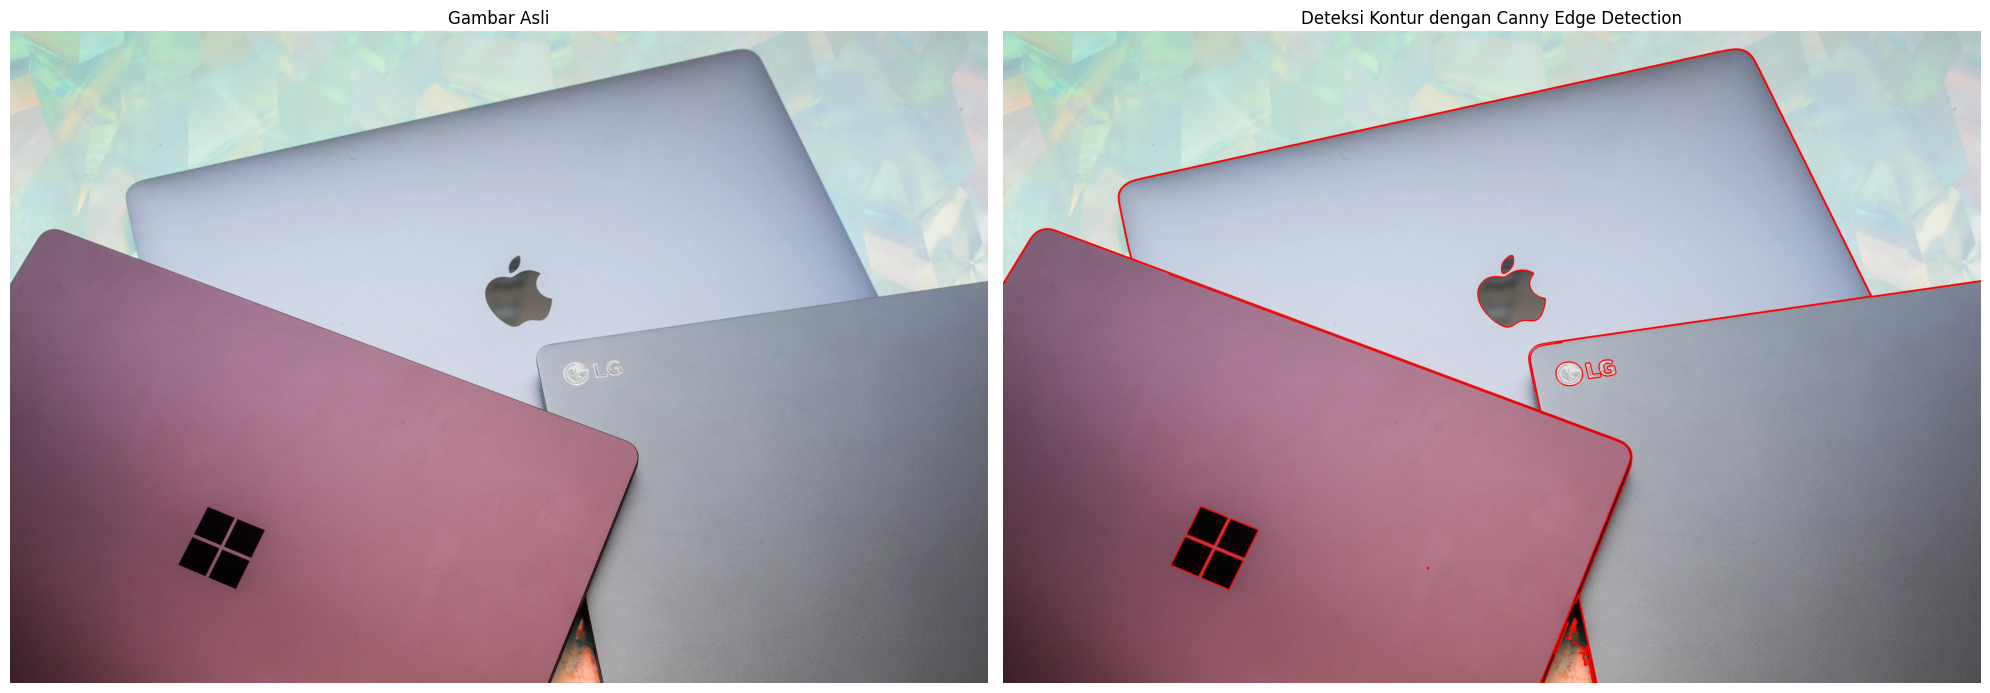

In [ ]:
# Load and convert image to grayscale
img = cv2.imread("/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur and Canny edge detection
edges = cv2.Canny(cv2.GaussianBlur(gray, (7, 7), 0), 20, 90)

# Dilate edges and find contours
dilated_edges = cv2.dilate(edges, np.ones((3, 3), np.uint8), iterations=1)
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
img_with_contours = img.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 0, 255), 3)

# Display original and contour images
titles = ['Gambar Asli', 'Deteksi Kontur dengan Canny Edge Detection']
images = [img, img_with_contours]

plt.figure(figsize=(20, 20))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

PENGAYAAN MATERI KTP

In [ ]:
import cv2
import os

In [ ]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/KTP"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, name_file))
    if src is None:
        print(f"Gambar {name_file} tidak dapat dibaca.")
        continue  # Lewati file yang tidak bisa dibaca

    blurred = src.copy()
    gray = blurred.copy()


In [ ]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

160.0 (636, 996)


Displaying: ktp6.png


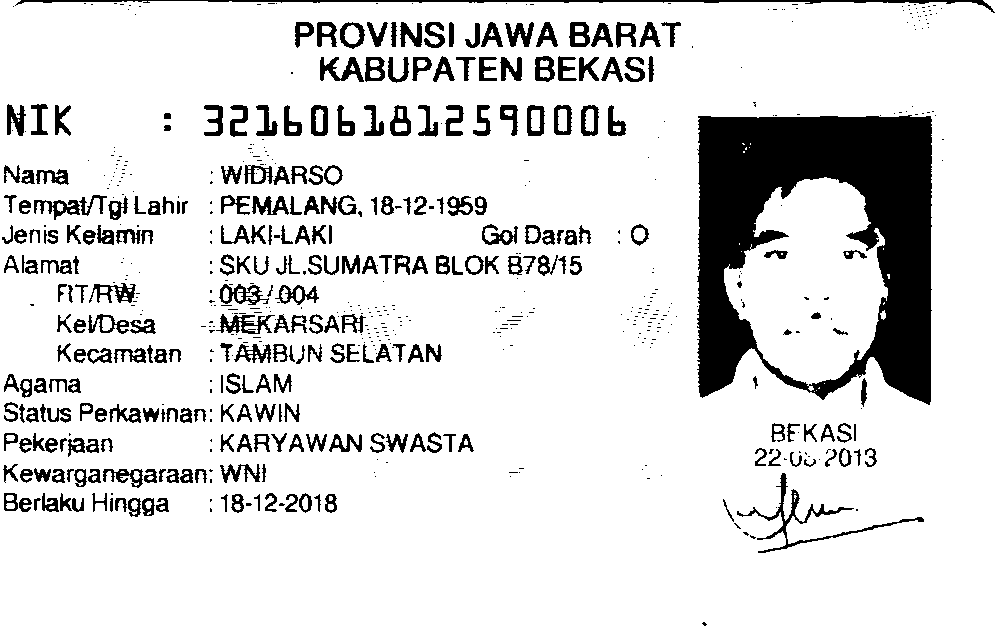

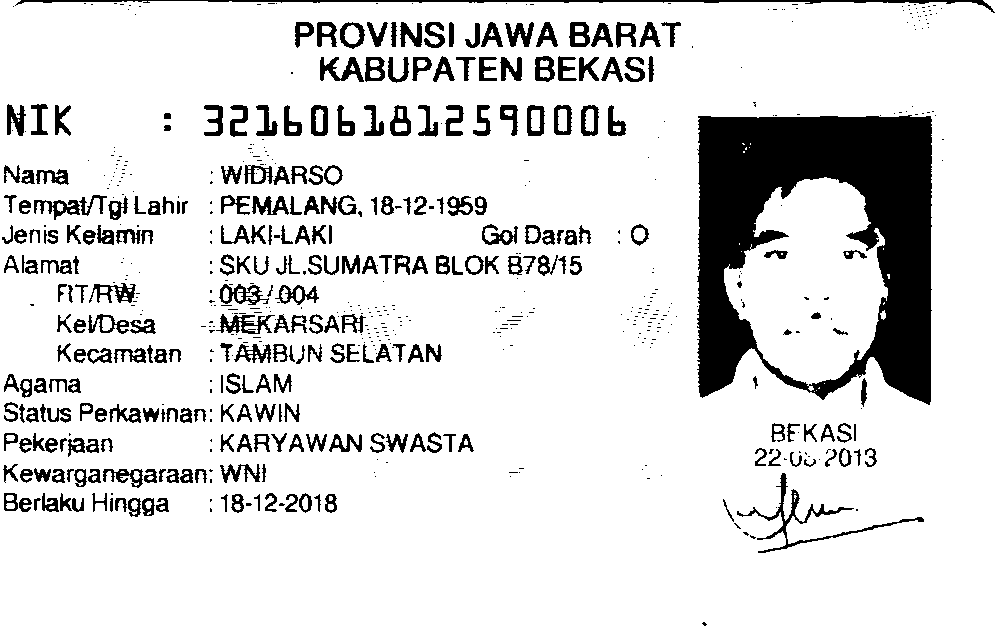

In [ ]:
from google.colab.patches import cv2_imshow

# Membuat kernel untuk dilasi dan erosi (misalnya 3x3)
kernel = np.ones((1, 1), np.uint8)

dilated_bw = cv2.dilate(bw, kernel, iterations=2)
eroded_bw = cv2.erode(dilated_bw, kernel, iterations=2)

print(f"Displaying: {name_file}")
cv2_imshow(bw)  # Menampilkan citra asli (binary)
cv2_imshow(eroded_bw)  # Menampilkan citra setelah erosi

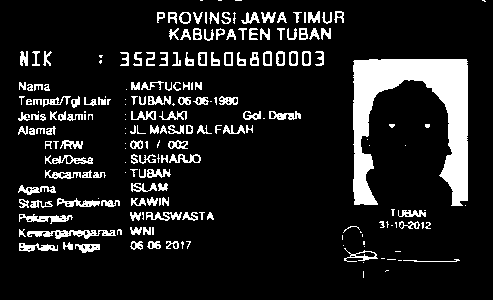

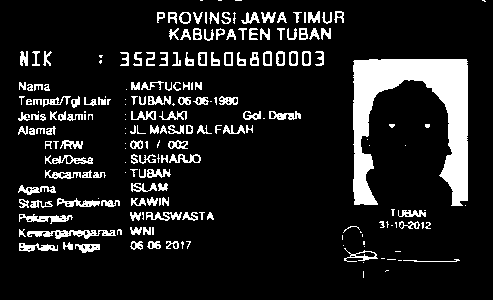

Jumlah kontur yang ditemukan: 209


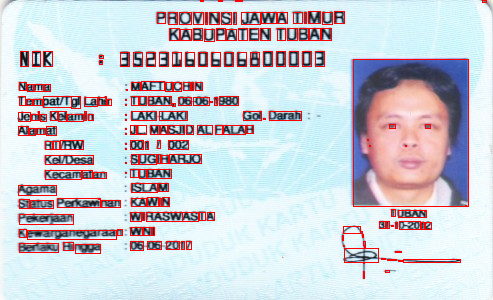

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image and convert to grayscale
src = cv2.imread("/content/drive/MyDrive/PCVK/KTP/ktp4.png")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Apply thresholding and show the binary image
_, bw = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(bw)

# Apply dilation and erosion, then display results
kernel = np.ones((1, 1), np.uint8)
eroded_bw = cv2.erode(cv2.dilate(bw, kernel, iterations=1), kernel, iterations=1)
cv2_imshow(eroded_bw)

# Find and draw contours
contours, _ = cv2.findContours(eroded_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Jumlah kontur yang ditemukan: {len(contours)}")

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), 1)

cv2_imshow(src)

TUGAS PRAKTIKUM - Menggunakan KTP Widiarso Bekasi

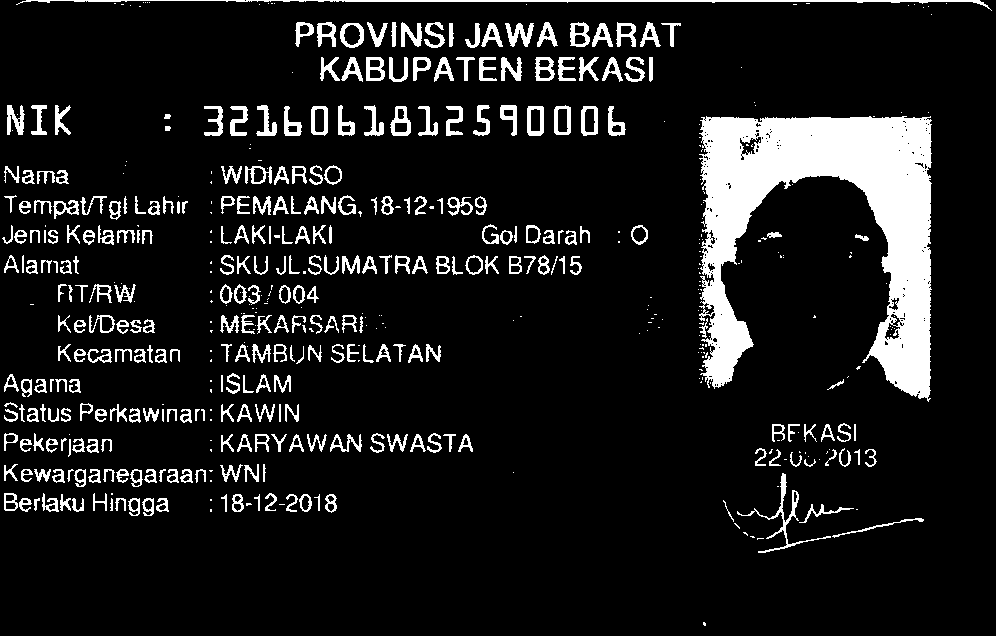

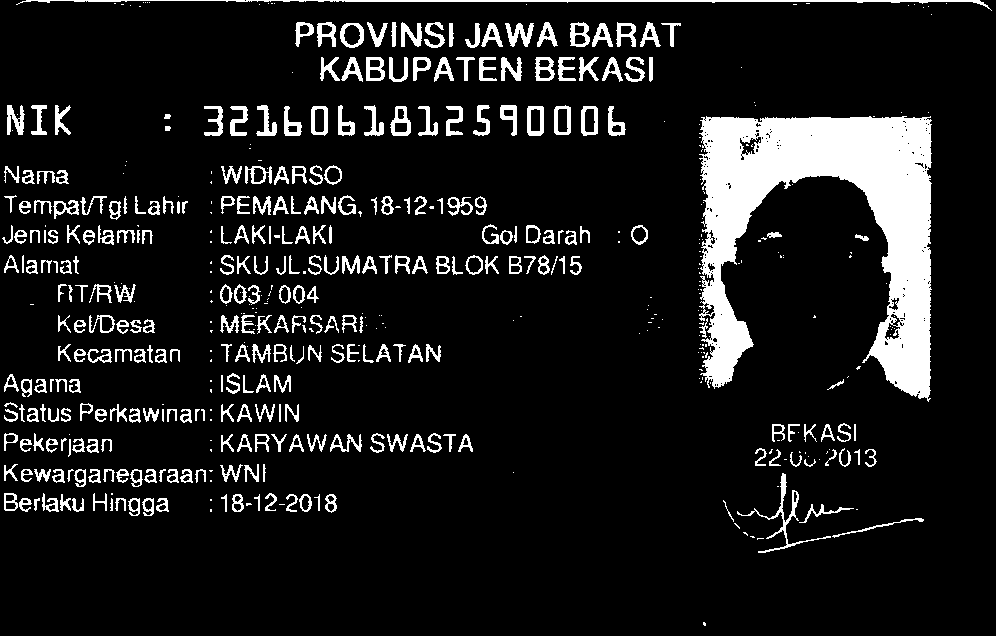

Jumlah kontur yang ditemukan: 514


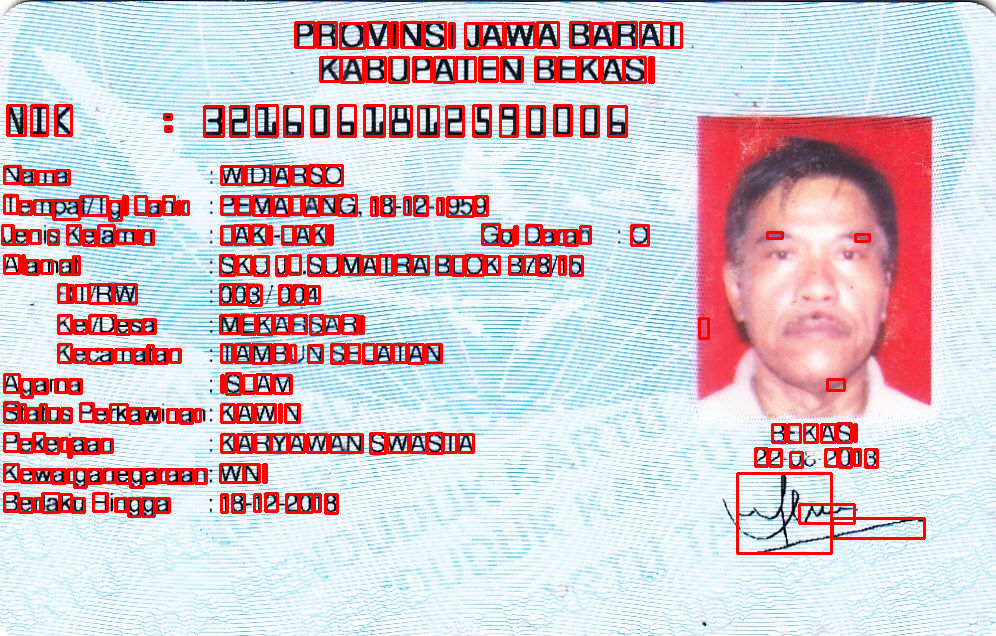

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image and convert to grayscale
src = cv2.imread("/content/drive/MyDrive/PCVK/KTP/ktp6.png")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Apply thresholding and show the binary image
_, bw = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(bw)

# Apply dilation and erosion, then display results
kernel = np.ones((1, 1), np.uint8)
eroded_bw = cv2.erode(cv2.dilate(bw, kernel, iterations=1), kernel, iterations=1)
cv2_imshow(eroded_bw)

# Find and draw contours
contours, _ = cv2.findContours(eroded_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Jumlah kontur yang ditemukan: {len(contours)}")

# Define min and max area thresholds and aspect ratio limits
min_area = 15
max_area = 5000
min_aspect_ratio = 0.1
max_aspect_ratio = 5.0

# Draw valid contours based on size and aspect ratio
for contour in contours:
    area = cv2.contourArea(contour)
    if area < min_area or area > max_area:
        continue

    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if aspect_ratio < min_aspect_ratio or aspect_ratio > max_aspect_ratio:
        continue

    cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(src)